Partie 1 : Réalisation de l'analyse exploratoire de données

In [241]:
pip install PyPDF2

In [242]:
!pip install reportlab

In [243]:
# Importez les bibliothèques nécessaires
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from PyPDF2 import PdfMerger
import datetime
from wordcloud import WordCloud
import datetime

In [244]:
# Chargez votre dataset
df=pd.read_csv('Youtube01-Psy.csv')

In [245]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [246]:
# Supprimer les colonnes 'colonne1' et 'colonne2'
df = df.drop(['COMMENT_ID', 'AUTHOR','DATE','CLASS'], axis=1)

In [247]:
df

,CONTENT
0,"Huh, anyway check out this you[tube] channel: ..."
1,Hey guys check out my new channel and our firs...
2,just for test I have to say murdev.com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿
4,watch?v=vtaRGgvGtWQ Check this out .﻿
...,...
345,How can this have 2 billion views when there's...
346,I don't now why I'm watching this in 2014﻿
347,subscribe to me for call of duty vids and give...
348,hi guys please my android photo editor downloa...


In [248]:
df.columns = ['contents']

In [249]:
df

,contents
0,"Huh, anyway check out this you[tube] channel: ..."
1,Hey guys check out my new channel and our firs...
2,just for test I have to say murdev.com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿
4,watch?v=vtaRGgvGtWQ Check this out .﻿
...,...
345,How can this have 2 billion views when there's...
346,I don't now why I'm watching this in 2014﻿
347,subscribe to me for call of duty vids and give...
348,hi guys please my android photo editor downloa...


In [250]:
# Chargez le modèle enregistré
model = joblib.load('emotions.joblib')

In [251]:
# Sélectionnez les colonnes nécessaires, par exemple la colonne contenant le texte
df_predict = df['contents']

In [252]:
# Appliquez le modèle aux données du dataset
predictions = model.predict(df_predict)

In [253]:
# Si vous avez des étiquettes réelles dans votre dataset
df['predicted_labels'] = predictions

In [254]:
df

,contents,predicted_labels
0,"Huh, anyway check out this you[tube] channel: ...",neutral
1,Hey guys check out my new channel and our firs...,hate
2,just for test I have to say murdev.com,neutral
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,surprise
4,watch?v=vtaRGgvGtWQ Check this out .﻿,neutral
...,...,...
345,How can this have 2 billion views when there's...,worry
346,I don't now why I'm watching this in 2014﻿,neutral
347,subscribe to me for call of duty vids and give...,sadness
348,hi guys please my android photo editor downloa...,neutral


In [255]:
df.dtypes

contents            object
predicted_labels    object
dtype: object

In [256]:
df.predicted_labels.value_counts()

neutral      179
worry         47
surprise      45
fun           27
sadness       15
happiness     12
love          11
hate          10
relief         4
Name: predicted_labels, dtype: int64

In [257]:
# Créez un mapping des valeurs numériques aux étiquettes textuelles
sentiment_mapping = {
    'happiness': 0,
    'fun': 1,
    'love': 2,
    'relief': 3,
    'neutral': 4,
    'worry': 5,
    'surprise': 6,
    'sadness': 7,
    'hate': 8
}


# Utilisez la méthode map pour associer les étiquettes numériques aux sentiments
df['predicted_label_numeriques'] = df['predicted_labels'].map(sentiment_mapping)

In [258]:
df

,contents,predicted_labels,predicted_label_numeriques
0,"Huh, anyway check out this you[tube] channel: ...",neutral,4
1,Hey guys check out my new channel and our firs...,hate,8
2,just for test I have to say murdev.com,neutral,4
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,surprise,6
4,watch?v=vtaRGgvGtWQ Check this out .﻿,neutral,4
...,...,...,...
345,How can this have 2 billion views when there's...,worry,5
346,I don't now why I'm watching this in 2014﻿,neutral,4
347,subscribe to me for call of duty vids and give...,sadness,7
348,hi guys please my android photo editor downloa...,neutral,4


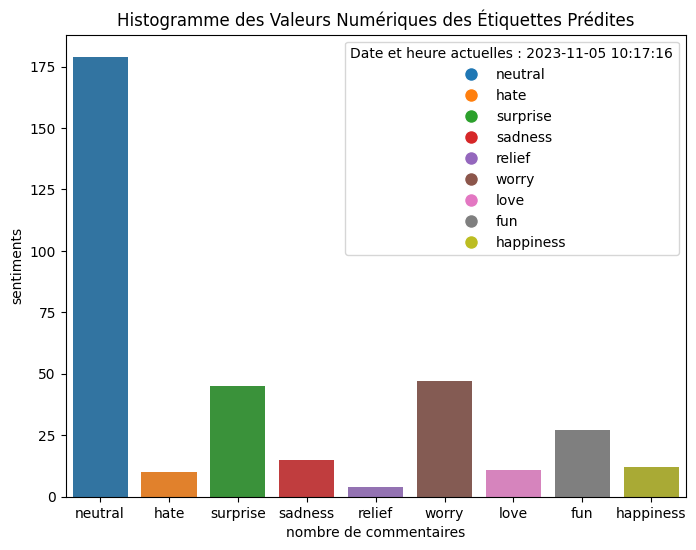

In [259]:
# Créer un histogramme avec Seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='predicted_labels')

# Obtenir la date et l'heure actuelles
now = datetime.datetime.now()
date_string = now.strftime("%Y-%m-%d %H:%M:%S")

# Créer un dictionnaire de correspondance entre les étiquettes prédites et les couleurs
label_colors = {label: color for label, color in zip(df['predicted_labels'].unique(), sns.color_palette())}

# Créer une légende avec les couleurs et les étiquettes
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in label_colors.items()]
ax.legend(handles=legend_labels, title=f'Date et heure actuelles : {date_string}', loc='upper right', fontsize=10)

plt.xlabel('nombre de commentaires')
plt.ylabel('sentiments')
plt.title('Histogramme des Valeurs Numériques des Étiquettes Prédites')

# Afficher l'histogramme
plt.show()

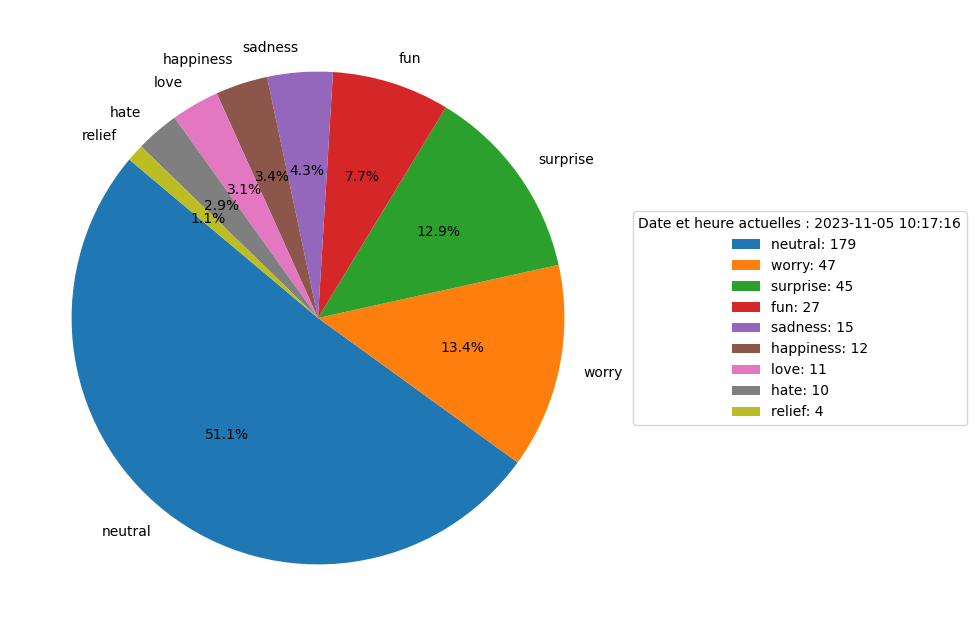

In [260]:
# Vos données
data = df['predicted_labels'].value_counts()

# Créer un diagramme circulaire
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)

# Obtenir la date et l'heure actuelles
now = datetime.datetime.now()
date_string = now.strftime("%Y-%m-%d %H:%M:%S")

# Créer une légende avec toutes les couleurs et étiquettes
legend_labels = [f'{label}: {count}' for label, count in zip(data.index, data)]
legend = ax.legend(wedges, legend_labels, title=f'Date et heure actuelles : {date_string}', loc='center left', fontsize=10)

# Déplacez la légende à l'extérieur du diagramme circulaire
legend.set_bbox_to_anchor((1, 0.5))

# Afficher le diagramme circulaire
plt.show()


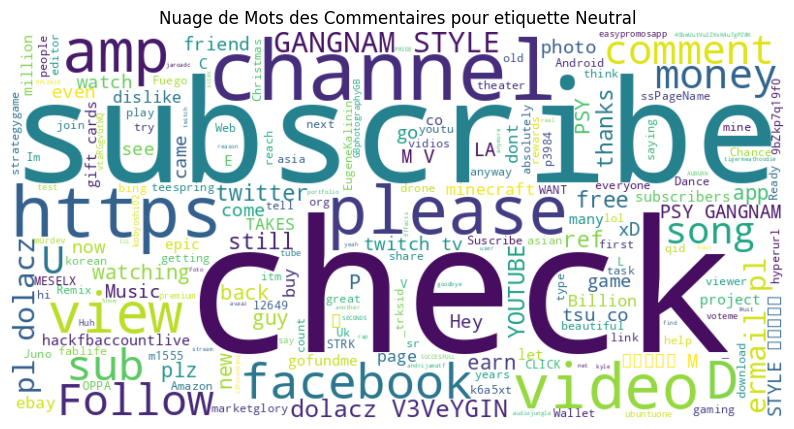

In [261]:
majority_label = df['predicted_labels'].value_counts().idxmax()

# Filtrer les commentaires avec l'étiquette majoritaire
majority_comments = df[df['predicted_labels'] == majority_label]['contents']

# Combinez les commentaires filtrés en une seule chaîne de texte
majority_comments_combined = " ".join(majority_comments)

# Créez le nuage de mots pour l'étiquette majoritaire
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(majority_comments_combined)

# Créez le graphique du nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Nuage de Mots des Commentaires pour etiquette {majority_label.capitalize()}")
plt.show()

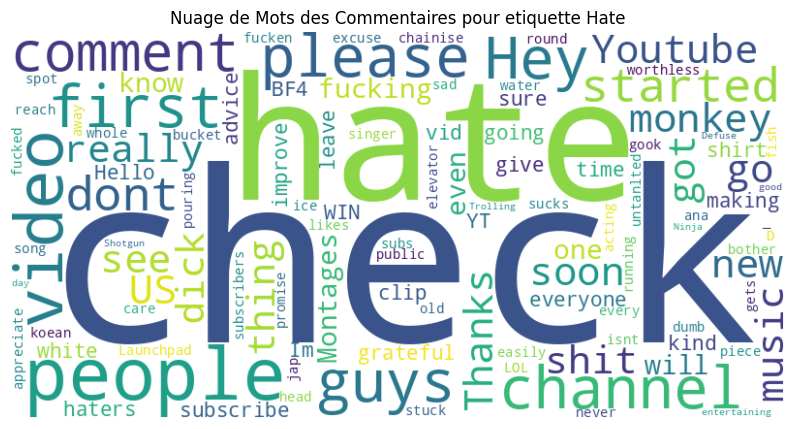

In [262]:
# Spécifiez l'étiquette pour laquelle vous souhaitez générer le nuage de mots
target_label = "hate"

# Filtrer les commentaires avec l'étiquette cible
target_comments = df[df['predicted_labels'] == target_label]['contents']

# Combinez les commentaires filtrés en une seule chaîne de texte
target_comments_combined = " ".join(target_comments)

# Créez le nuage de mots pour l'étiquette cible
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(target_comments_combined)

# Créez le graphique du nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Nuage de Mots des Commentaires pour etiquette {target_label.capitalize()}")

plt.show()

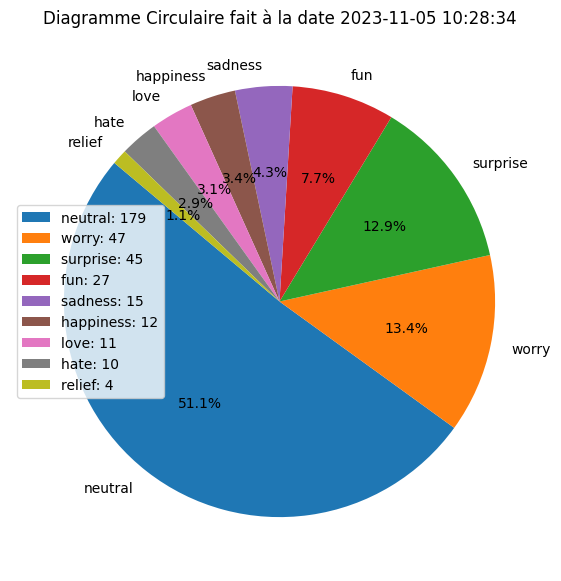

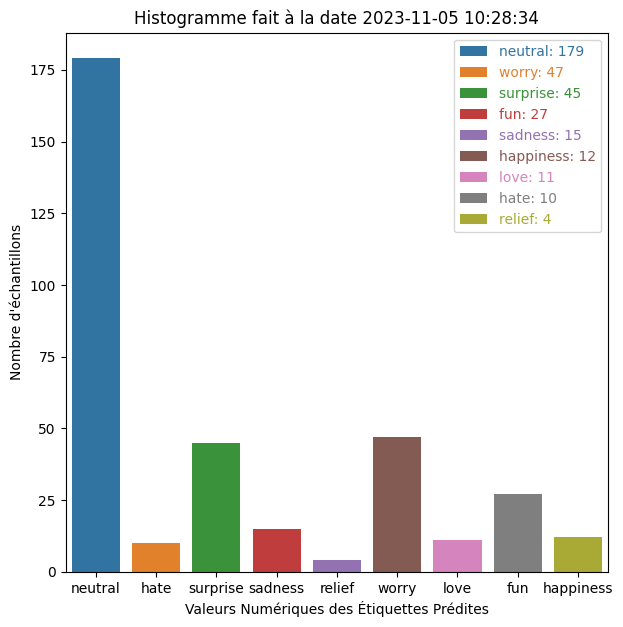

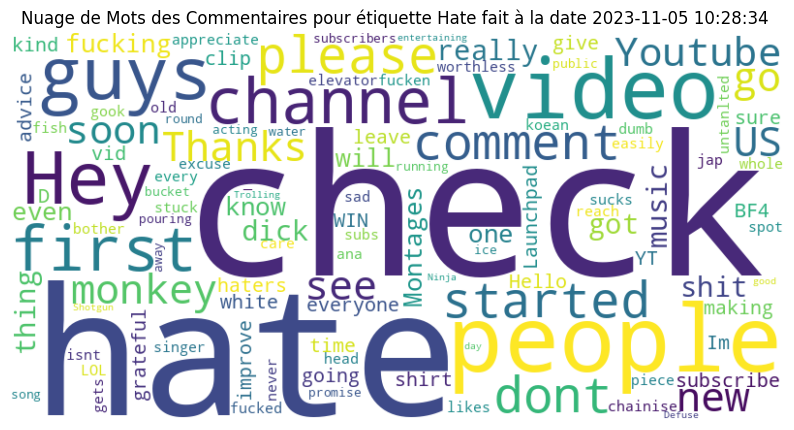

In [266]:
# Créez un objet PdfPages pour enregistrer les graphiques dans le même fichier PDF
pdf_pages = PdfPages('multipage_plots.pdf')

# Obtenir la date et l'heure actuelles
now = datetime.datetime.now()
date_string = now.strftime("%Y-%m-%d %H:%M:%S")

# Créer le premier graphique (diagramme circulaire)
data = df['predicted_labels'].value_counts()
fig1, ax1 = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax1.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
ax1.set_title(f'Diagramme Circulaire fait à la date {date_string}')

# Ajoutez la légende avec la date et l'heure actuelles
legend_labels = [f'{label}: {count}' for label, count in zip(data.index, data)]
legend_labels.append(f'Date et heure actuelles : {date_string}')
ax1.legend(wedges, legend_labels, loc='center left', fontsize=10)
ax1.set_aspect('equal')

# Ajoutez le premier graphique à la page PDF
pdf_pages.savefig(fig1)

# Créez le deuxième graphique (histogramme)
fig2, ax2 = plt.subplots(figsize=(7, 7))
sns.countplot(data=df, x='predicted_labels', ax=ax2)
ax2.set_xlabel('Valeurs Numériques des Étiquettes Prédites')
ax2.set_ylabel('Nombre d\'échantillons')
ax2.set_title('Histogramme des Valeurs Numériques des Étiquettes Prédites')
# Ajoutez le titre en incluant la date actuelle
ax2.set_title(f'Histogramme fait à la date {date_string}')

# Obtenir les couleurs des barres de l'histogramme
colors = [patch.get_facecolor() for patch in ax2.patches]

# Créez une légende personnalisée avec des étiquettes colorées
legend_labels = [f'{label}: {count}' for label, count in zip(data.index, data)]
legend_labels.append(f'Date et heure actuelles : {date_string}')

# Créez une légende colorée
legend = ax2.legend(handles=ax2.patches, labels=legend_labels, loc='upper right', fontsize=10)
for text, color in zip(legend.get_texts(), colors):
    text.set_color(color)

# Ajoutez le deuxième graphique à la page PDF
pdf_pages.savefig(fig2)




# Spécifiez l'étiquette pour laquelle vous souhaitez générer le nuage de mots
target_label = "hate"

# Filtrer les commentaires avec l'étiquette cible
target_comments = df[df['predicted_labels'] == target_label]['contents']

# Combinez les commentaires filtrés en une seule chaîne de texte
target_comments_combined = " ".join(target_comments)

# Créez le nuage de mots pour l'étiquette cible
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(target_comments_combined)

# Créez le graphique du nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Nuage de Mots des Commentaires pour étiquette {target_label.capitalize()} fait à la date {date_string} ")


# Ajoutez le graphique du nuage de mots à la page PDF
pdf_pages.savefig(plt.gcf())

# Fermez le fichier PDF une fois que vous avez ajouté le graphique du nuage de mots

pdf_pages.close()

In [264]:
# # Créez un objet PdfPages pour enregistrer les graphiques dans le même fichier PDF
# pdf_pages = PdfPages('multipage_plots.pdf')

# # Obtenir la date et l'heure actuelles
# now = datetime.datetime.now()
# date_string = now.strftime("%Y-%m-%d %H:%M:%S")

# # Créer le premier graphique (diagramme circulaire)
# data = df['predicted_labels'].value_counts()
# fig1, ax1 = plt.subplots(figsize=(7, 7))
# wedges, texts, autotexts = ax1.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
# ax1.set_title('Diagramme Circulaire des Étiquettes Prédites')

# # Ajoutez la légende avec la date et l'heure actuelles
# legend_labels = [f'{label}: {count}' for label, count in zip(data.index, data)]
# legend_labels.append(f'Date et heure actuelles : {date_string}')
# ax1.legend(wedges, legend_labels, loc='center left', fontsize=10)
# ax1.set_aspect('equal')

# # Ajoutez le premier graphique à la page PDF
# pdf_pages.savefig(fig1)

# # Créez le deuxième graphique (histogramme)
# fig2, ax2 = plt.subplots(figsize=(7, 7))
# sns.countplot(data=df, x='predicted_labels', ax=ax2)
# ax2.set_xlabel('Valeurs Numériques des Étiquettes Prédites')
# ax2.set_ylabel('Nombre d\'échantillons')
# ax2.set_title('Histogramme des Valeurs Numériques des Étiquettes Prédites')

# # Obtenir les couleurs des barres de l'histogramme
# colors = [patch.get_facecolor() for patch in ax2.patches]

# # Créez une légende personnalisée avec des étiquettes colorées
# legend_labels = [f'{label}: {count}' for label, count in zip(data.index, data)]
# legend_labels.append(f'Date et heure actuelles : {date_string}')

# # Créez une légende colorée
# legend = ax2.legend(handles=ax2.patches, labels=legend_labels, loc='upper right', fontsize=10)
# for text, color in zip(legend.get_texts(), colors):
#     text.set_color(color)

# # Ajoutez le deuxième graphique à la page PDF
# pdf_pages.savefig(fig2)

# # Spécifiez l'étiquette pour laquelle vous souhaitez générer le nuage de mots
# target_label = "hate"

# # Filtrer les commentaires avec l'étiquette cible
# target_comments = df[df['predicted_labels'] == target_label]['contents']

# # Combinez les commentaires filtrés en une seule chaîne de texte
# target_comments_combined = " ".join(target_comments)

# # Créez le nuage de mots pour l'étiquette cible
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(target_comments_combined)

# # Créez le graphique du nuage de mots
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.title(f"Nuage de Mots des Commentaires pour étiquette {target_label.capitalize()}")

# # Ajoutez le graphique du nuage de mots à la page PDF
# pdf_pages.savefig(plt.gcf())

# # Fermez le fichier PDF une fois que vous avez ajouté le graphique du nuage de mots
# pdf_pages.close()